In [1]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
path ="Dataset/"
train_Data = pd.read_csv(path + "training_data.csv", header=None)

In [3]:
train_Data.shape


(1511, 4)

In [4]:
train_Data.columns = ['open','high','low','close']

In [5]:
train_Data.head()

,open,high,low,close
0,209.894836,216.427353,207.758728,216.208771
1,220.515762,223.029404,218.454163,221.181427
2,221.558975,224.316040,219.323517,224.162048
3,226.958847,233.729813,225.155579,231.325455
4,231.698029,235.170441,228.980698,231.941452


In [6]:
# diff = [0]
# prev_close = 216.208771
# for index, row in train_Data.iterrows():
#     if index ==0:
#         continue
#     diff.append(row['open']-prev_close)
#     prev_close = row['close']
    

In [7]:
# Normalize the data -> Maybe useful?
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    return df
new_train_Data = normalize_data(train_Data)
new_train_Data.head()

,open,high,low,close
0,0.334315,0.348003,0.357798,0.367069
1,0.378985,0.375813,0.402868,0.387736
2,0.383373,0.381233,0.406531,0.400124
3,0.406084,0.420889,0.431107,0.429896
4,0.426016,0.426957,0.447226,0.432456


In [8]:
train_Data.head()

,open,high,low,close
0,0.334315,0.348003,0.357798,0.367069
1,0.378985,0.375813,0.402868,0.387736
2,0.383373,0.381233,0.406531,0.400124
3,0.406084,0.420889,0.431107,0.429896
4,0.426016,0.426957,0.447226,0.432456


## Visual the data 

In [9]:
def visaulize(df):    
    plt.plot(df.open.values, color='red', label='open')
    plt.plot(df.close.values, color='green', label='close')
    plt.plot(df.low.values, color='blue', label='low')
    plt.plot(df.high.values, color='black', label='high')
    plt.title('stock price')
    plt.xlabel('time [days]')
    plt.ylabel('price')
    plt.legend(loc='best')
    plt.show()

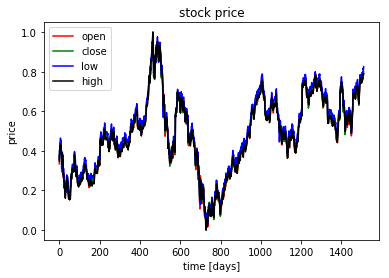

In [10]:
visaulize(train_Data)

In [11]:
# Dont care about this function.
# It's used in Deep learning Model.
def select_action(action_prob):
    values, indices = torch.max(action_prob, 1)
    indices = indices.data.numpy(1)[0]
    if indices ==0: action = -1
    elif indices == 1: action = 0
    elif indices == 2: action = 1
    return action

In [12]:
# Dont care about here. It's deep learning
import torch 
from Model import Policy
from Stock_Environment import Env
import importlib
from torch.autograd import Variable

importlib.reload(Policy)

<module 'Model.Policy' from '/Users/chenyuhua/python/Stock /Model/Policy.py'>

In [13]:
Policy = Policy.Policy_Model()
Env = Env.env()

In [14]:
for i in range(1):
    four_features = list(train_Data.iloc[i])
    four_features = [int(i) for i in four_features]
    
    four_features_var = Variable(torch.FloatTensor(four_features)) #DL
    status, income = Env.Current() # return current status and income
    
    status = Variable(torch.LongTensor([status])) # DL
    income = Variable(torch.FloatTensor([income])) #DL
    
    data = (four_features_var, status, income) 
    action = Policy(data)   # put inside your model
    action = select_action(action) # don's care
    Env.execute_action(action, four_features[0]) # put current action and open_prize in int 
